# Milestone Project

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv('hotel_bookings.csv')

In [ ]:
df = df.sample(n=50000, random_state=42)

In [ ]:
df.reset_index()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,30946,Resort Hotel,0,203,2016,December,49,2,2,5,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,F,F,4,No Deposit,250.0,NaN,0,Transient,66.8,0,0,Check-Out,2016-12-09
1,40207,City Hotel,1,82,2015,July,29,16,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,0,Canceled,2015-07-16
2,103708,City Hotel,0,25,2016,December,53,27,0,3,3,0.0,0,BB,BRA,Offline TA/TO,TA/TO,0,0,0,A,K,2,No Deposit,220.0,NaN,0,Transient-Party,60.0,0,1,Check-Out,2016-12-30
3,85144,City Hotel,0,1,2016,March,11,9,0,1,1,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient-Party,95.0,0,0,Check-Out,2016-03-10
4,109991,City Hotel,0,70,2017,April,16,16,2,2,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,108.0,0,0,Check-Out,2017-04-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,82520,City Hotel,0,98,2015,December,53,29,0,3,2,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,83.0,NaN,0,Transient-Party,59.5,0,2,Check-Out,2016-01-01
49996,80860,City Hotel,1,0,2017,February,8,21,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,7,A,A,0,No Deposit,NaN,148.0,0,Transient,80.0,0,0,Canceled,2017-02-21
49997,77053,City Hotel,1,262,2015,November,46,9,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.8,0,0,Canceled,2015-09-04
49998,72281,City Hotel,1,20,2017,July,30,25,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,140.0,0,0,Canceled,2017-07-06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 30946 to 45898
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           50000 non-null  object 
 1   is_canceled                     50000 non-null  int64  
 2   lead_time                       50000 non-null  int64  
 3   arrival_date_year               50000 non-null  int64  
 4   arrival_date_month              50000 non-null  object 
 5   arrival_date_week_number        50000 non-null  int64  
 6   arrival_date_day_of_month       50000 non-null  int64  
 7   stays_in_weekend_nights         50000 non-null  int64  
 8   stays_in_week_nights            50000 non-null  int64  
 9   adults                          50000 non-null  int64  
 10  children                        50000 non-null  float64
 11  babies                          50000 non-null  int64  
 12  meal                        

In [ ]:
df.shape

(50000, 32)

# EDA

### A. Tipe - Tipe Data

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### B. Describe feature data dan beberapa distribusi data.

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,43158.000000,2845.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,0.371600,104.030080,2016.157220,27.156940,15.802880,0.923300,2.491960,1.857600,0.102120,0.007960,0.031660,0.085060,0.137620,0.221220,86.665091,188.391564,2.26486,101.955308,0.061460,0.573240
std,0.483237,106.953591,0.708288,13.592113,8.754873,0.992168,1.896082,0.550898,0.396856,0.098065,0.175095,0.805951,1.494191,0.645205,110.807878,131.573433,17.43284,48.091588,0.241669,0.794083
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.00000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.00000,69.182500,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,174.000000,0.00000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.00000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,9.000000,1.000000,26.000000,72.000000,18.000000,531.000000,541.000000,391.00000,508.000000,3.000000,5.000000


In [ ]:
df.describe(exclude='number')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,50000,50000,50000,49791,50000,50000,50000,50000,50000,50000,50000,50000
unique,2,12,5,150,7,5,10,12,3,4,3,900
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,33247,5830,38648,20348,23486,40916,36035,31006,43771,37515,31420,644


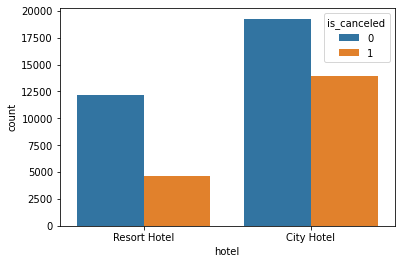

In [ ]:
sns.countplot(data=df, x='hotel', hue='is_canceled')

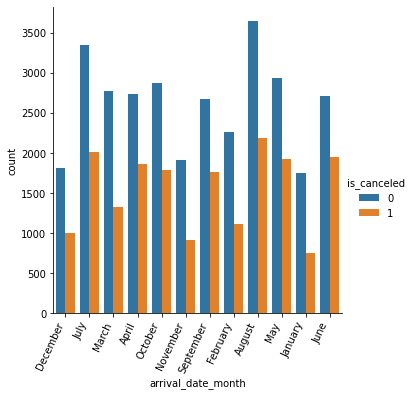

In [ ]:
bulan = sns.catplot(data=df, x='arrival_date_month', hue='is_canceled', kind='count')
bulan.set_xticklabels(rotation=65, horizontalalignment='right')

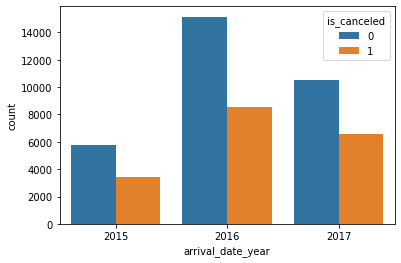

In [ ]:
sns.countplot(data=df, x='arrival_date_year', hue='is_canceled')

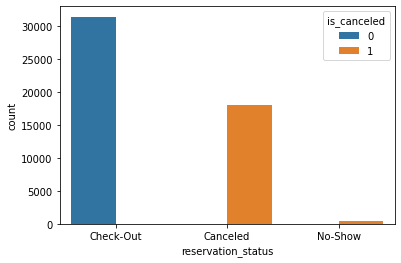

In [ ]:
sns.countplot(data=df, x='reservation_status', hue='is_canceled')

### C. Tamu berasal dari mana?

In [ ]:
df['country'].unique()

array(['GBR', 'PRT', 'BRA', 'SWE', 'DEU', 'SVN', 'ESP', 'BEL', 'FRA',
       'USA', 'ARG', 'NLD', 'UGA', 'EST', 'TUR', 'AUT', 'LUX', 'KOR',
       'CHN', nan, 'AUS', 'ARE', 'JAM', 'IRL', 'AGO', 'NOR', 'CN', 'ISR',
       'DZA', 'CHE', 'MAR', 'ITA', 'NGA', 'CZE', 'FIN', 'JPN', 'RUS',
       'DNK', 'PRY', 'POL', 'LTU', 'HUN', 'MOZ', 'QAT', 'IND', 'GIB',
       'BIH', 'ROU', 'ISL', 'HRV', 'CIV', 'ZAF', 'BGR', 'LVA', 'COL',
       'KWT', 'DOM', 'CHL', 'SGP', 'ECU', 'IRN', 'ARM', 'BEN', 'GRC',
       'BLR', 'SRB', 'ALB', 'TGO', 'EGY', 'MEX', 'MCO', 'AZE', 'CYP',
       'MDV', 'KEN', 'TMP', 'MUS', 'SVK', 'IDN', 'GEO', 'TZA', 'SEN',
       'NZL', 'VEN', 'JOR', 'PRI', 'BOL', 'LCA', 'UKR', 'GTM', 'AND',
       'BGD', 'CRI', 'MWI', 'URY', 'TWN', 'PAK', 'BRB', 'SAU', 'MKD',
       'HKG', 'GNB', 'MYS', 'PHL', 'THA', 'MYT', 'KAZ', 'LIE', 'MAC',
       'TUN', 'ABW', 'GAB', 'LBN', 'CAF', 'LBY', 'FRO', 'HND', 'CPV',
       'PER', 'MLT', 'CMR', 'OMN', 'ZWE', 'BHR', 'JEY', 'TJK', 'DJI',
       'CUB', 'I

### Berapa harga room per night? Ada perbedaan hargakah?

In [ ]:
df['adr'].describe()

count    50000.000000
mean       101.955308
std         48.091588
min         -6.380000
25%         69.182500
50%         95.000000
75%        126.000000
max        508.000000
Name: adr, dtype: float64

### D. Berapa lama tamu tinggal di hotel?

In [ ]:
df.pivot_table(columns='hotel', values=['stays_in_weekend_nights', 'stays_in_week_nights'], aggfunc=lambda x:x.sum())

hotel,City Hotel,Resort Hotel
stays_in_week_nights,72166,52432
stays_in_weekend_nights,26242,19923


In [ ]:
df['stays_in_week_nights'].unique()

array([ 5,  3,  1,  2,  4,  0,  8,  6,  9, 15, 10, 11, 12,  7, 19, 13, 18,
       20, 30, 17, 14, 50, 32, 16, 33, 21, 22, 25])

In [ ]:
round(df['stays_in_week_nights'].mean())

2

In [ ]:
df['stays_in_weekend_nights'].unique()

array([ 2,  0,  1,  3,  4,  6,  5,  7,  8, 12, 19, 13,  9, 10])

In [ ]:
round(df['stays_in_weekend_nights'].mean())

1

### E. Ada market segment?

In [ ]:
df['market_segment'].unique()

array(['Direct', 'Online TA', 'Offline TA/TO', 'Groups', 'Corporate',
       'Aviation', 'Complementary'], dtype=object)

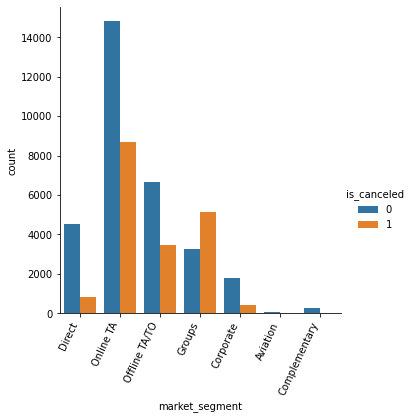

In [ ]:
market_segment = sns.catplot(data=df, x='market_segment', kind='count', hue='is_canceled')
market_segment.set_xticklabels(rotation=65, horizontalalignment='right')

### F. Berapa banyak booking yang dicancel/tidak dicancel?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


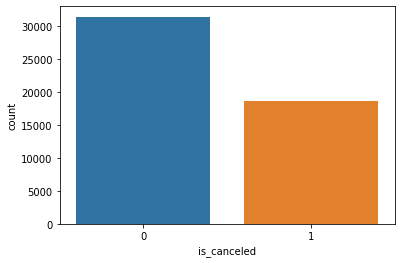

In [ ]:
sns.countplot(df['is_canceled'])

In [ ]:
df['is_canceled'].value_counts() 

0    31420
1    18580
Name: is_canceled, dtype: int64

In [ ]:
iscanceled = len(df[df['is_canceled']==1])
print("Percentage cancelation= ", iscanceled/len(df))
df['reservation_status'].value_counts(normalize=True)*100

Percentage cancelation=  0.3716


Check-Out    62.84
Canceled     36.17
No-Show       0.99
Name: reservation_status, dtype: float64

Cancel pada Resort Hotel=  0.2748761415865815
Cancel pada City Hotel=  0.42033867717388035


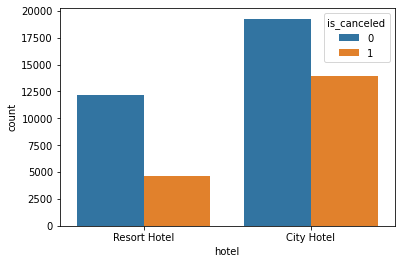

In [ ]:
sns.countplot(data=df, x='hotel', hue='is_canceled')

resort_hotel = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==1)]
city_hotel = df[(df['hotel']=='City Hotel') & (df['is_canceled']==1)]

print('Cancel pada Resort Hotel= ', (len(resort_hotel))/(len(df[df['hotel']=='Resort Hotel'])))
print('Cancel pada City Hotel= ', (len(city_hotel))/(len(df[df['hotel']=='City Hotel'])))

Cancelations among new guests=  0.37877191895408635
Cancelations among old guests=  0.15224257738471256


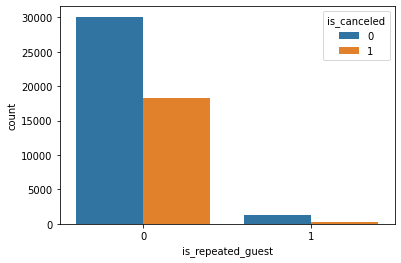

In [ ]:
sns.countplot(data=df, x='is_repeated_guest', hue='is_canceled')

new_guest = df[(df['is_repeated_guest']==0) & (df['is_canceled']==1)]
old_guest = df[(df['is_repeated_guest']==1) & (df['is_canceled']==1)]

print('Cancelations among new guests= ', (len(new_guest))/(len(df[df['is_repeated_guest']==0])))
print('Cancelations among old guests= ', (len(old_guest))/(len(df[df['is_repeated_guest']==1])))

# Data Cleaning & Preprocessing

### A. Handling Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 30946 to 45898
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           50000 non-null  object 
 1   is_canceled                     50000 non-null  int64  
 2   lead_time                       50000 non-null  int64  
 3   arrival_date_year               50000 non-null  int64  
 4   arrival_date_month              50000 non-null  object 
 5   arrival_date_week_number        50000 non-null  int64  
 6   arrival_date_day_of_month       50000 non-null  int64  
 7   stays_in_weekend_nights         50000 non-null  int64  
 8   stays_in_week_nights            50000 non-null  int64  
 9   adults                          50000 non-null  int64  
 10  children                        50000 non-null  float64
 11  babies                          50000 non-null  int64  
 12  meal                        

In [ ]:
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['agent'].fillna(df['agent'].mode()[0], inplace=True)
df['company'].fillna(df['company'].mode()[0], inplace=True)

### B. Handling Outliers

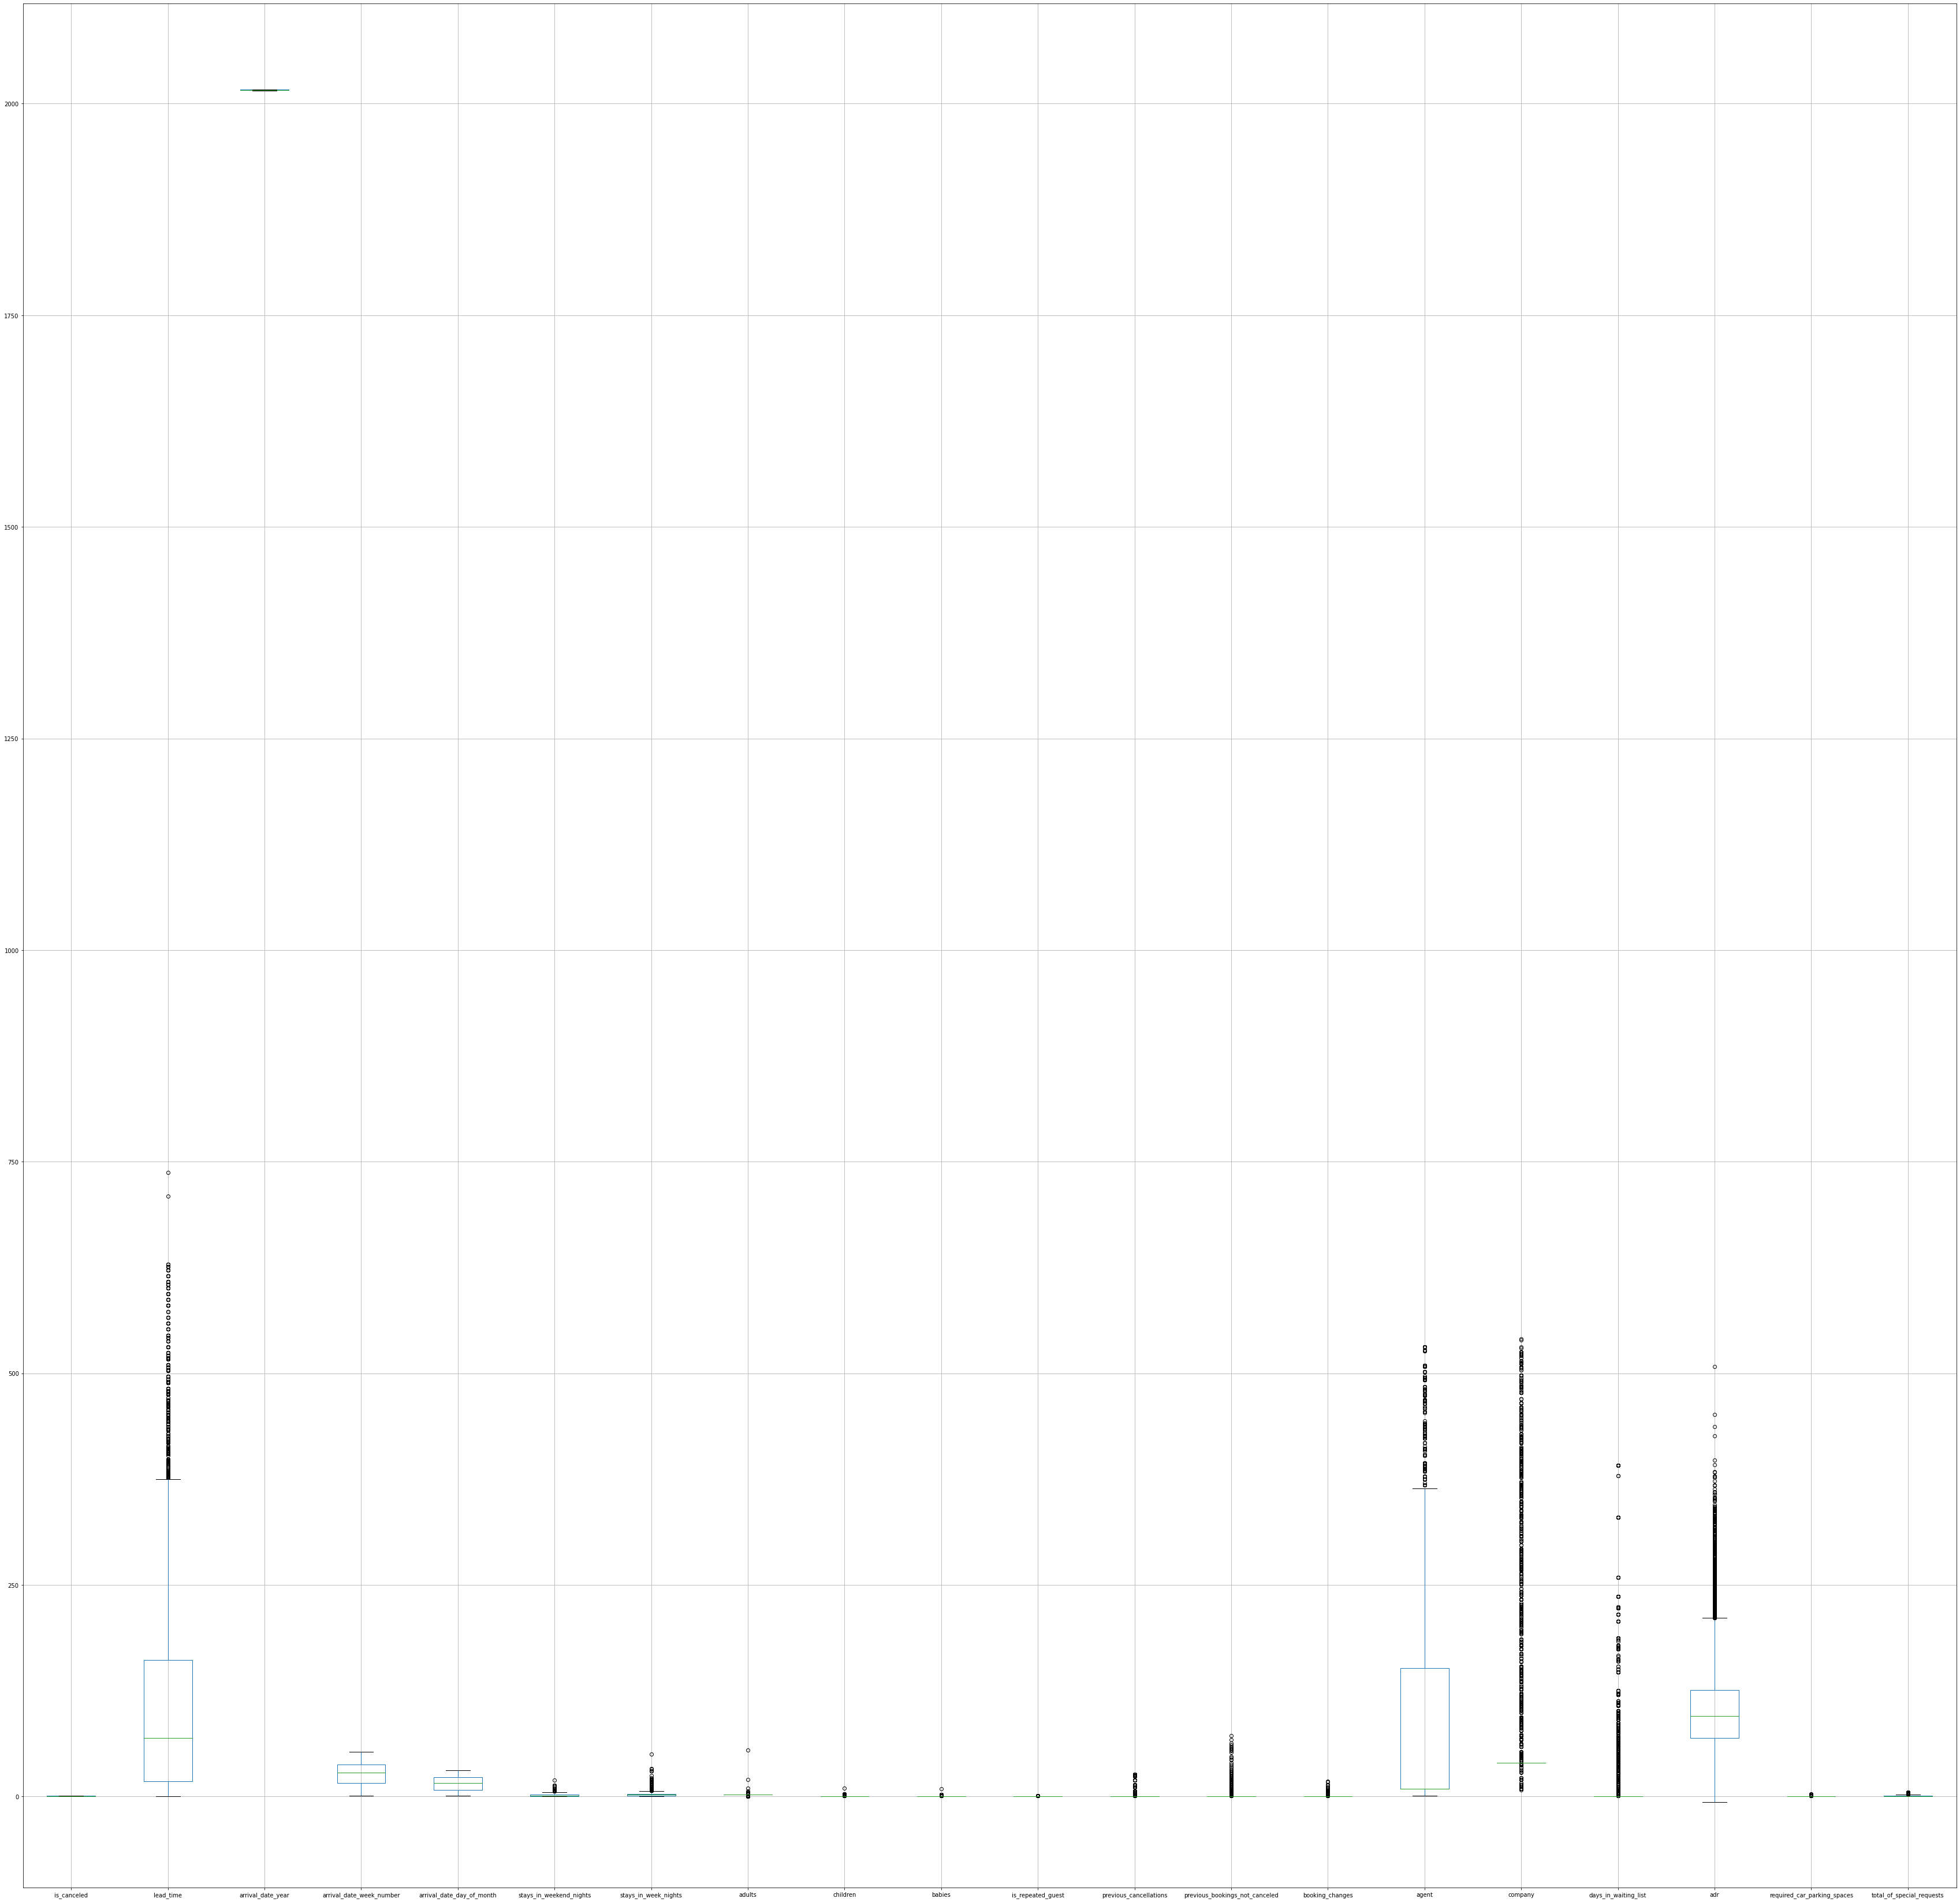

In [ ]:
plt.figure(figsize=(60,60))
df.boxplot()

Lead Time

In [ ]:
df['lead_time'].unique()

array([203,  82,  25,   1,  70, 170,  21, 102,  55, 222, 120,  88,  79,
        41, 239,  23,  34,  38, 160,  32,  56,  97,  85, 278, 175,  26,
       360, 378, 165,   4, 179, 349,  47, 237,  31, 158, 386,  10,  76,
        42, 210,  33,   7,  28, 274, 155,  48, 154, 364,  18,  15,  22,
        80, 164,  69,   3, 206, 157,  30,  53, 246, 304, 127,   0, 113,
       272,  11,  98, 292,  16,  49, 379, 289, 108, 128,  46, 332, 260,
       166, 172,   2,   8, 468,  36, 262,  91,  50,  19,  61, 297, 131,
       228, 330, 144, 313, 524, 138, 156, 391,  66, 256,  94, 191,   9,
        81, 150, 448, 152,  14, 135, 236, 316, 200, 277, 242, 253, 357,
       118, 207,  87,  37, 110,  74, 143, 344,  43, 100,  92, 215, 208,
        78, 133, 199,  40,  13,   5, 153,  54, 235, 185, 229,  17, 149,
       163, 122, 395,  71, 151, 169,  73, 219, 288, 162, 214, 142,  99,
       320, 211, 198, 408,  27, 129, 275, 107, 281, 111, 190, 240, 279,
        64, 594,  84, 184, 130, 248, 233, 183, 355,  96, 181,   

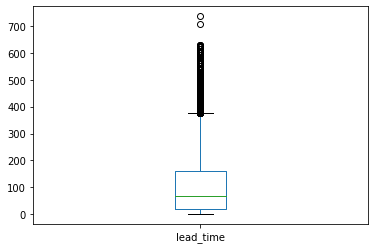

In [ ]:
df['lead_time'].plot(kind='box')

In [ ]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_iqr(df['lead_time'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 378, 378, 378, 378, 378, 378, 378, 378, 378, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 380, 381, 382, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 384, 384, 384, 384, 384, 384, 384, 384, 384, 385, 385, 385, 385, 385, 385, 385, 385, 385, 385, 385, 385, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 38

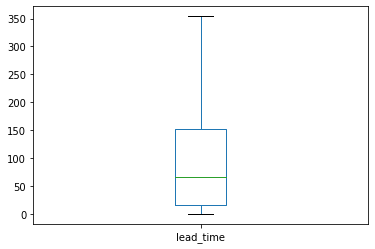

In [ ]:
df = df[df['lead_time']<377]
df['lead_time'].plot(kind='box', showfliers=False)
plt.show()

ADR

In [ ]:
df['adr'].unique()

array([ 66.8 ,  76.5 ,  60.  , ...,  38.83,  80.32, 215.55])

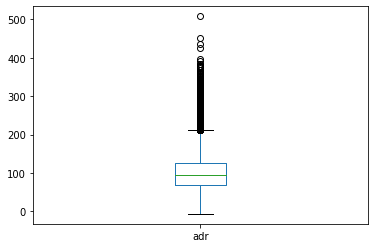

In [ ]:
df['adr'].plot(kind='box')

In [ ]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(df['adr'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [211.91, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.0, 212.1, 212.14, 212.14, 212.17, 212.29, 212.31, 212.33, 212.4, 212.4, 212.5, 212.5, 212.6, 212.67, 212.67, 212.71, 212.72, 212.73, 212.8, 212.8, 212.8, 213.0, 213.0, 213.0, 213.0, 213.0, 213.0, 213.3, 213.3, 213.3, 213.6, 213.6, 213.6, 213.6, 213.75, 213.75, 213.75, 213.75, 213.75, 214.0, 214.0, 214.0, 214.0, 214.0, 214.0, 214.0, 214.0, 214.0, 214.0, 214.0, 214.0, 214.0, 214.0, 214.0, 214.0, 214.0, 214.0, 214.0, 214.1, 214.2, 214.2, 214.33, 214.4, 214.6, 214.67, 214.71, 214.75, 214.76, 214.8, 214.84, 214.86, 214.92, 214.99, 215.0, 215.0, 215.0, 215.0, 215.0, 215.0, 215.0, 215.0, 215.0, 215.0, 215.0, 215.0, 215.0, 215.0, 215.0, 215.0, 215.25, 215.27, 215.33, 215.33, 215.33, 215.33, 215.5, 215.5, 215.55, 215.6, 215.6, 215.6, 215.71, 215.86, 216.0, 216.0, 216.0, 216.0, 216.0, 216.0, 216.0, 216.0, 216.0, 216.0, 216.0, 216.0,

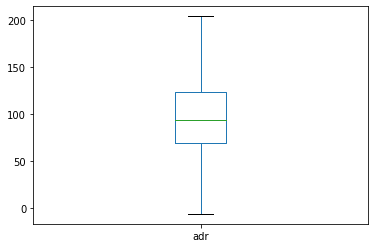

In [ ]:
df = df[df['adr']<211.25]
df['adr'].plot(kind='box', showfliers=False)
plt.show()

### C. Handling Duplicates

In [ ]:
df.duplicated().any()

True

In [ ]:
df.duplicated().sum()

9777

In [ ]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
44455,City Hotel,1,97,2015,October,41,5,1,3,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,29.0,40.0,0,Transient,140.00,0,0,Canceled,2015-07-03
44430,City Hotel,1,97,2015,October,41,5,1,3,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,29.0,40.0,0,Transient,140.00,0,0,Canceled,2015-07-03
60182,City Hotel,1,277,2016,November,46,7,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,9.0,40.0,0,Transient,100.00,0,0,Canceled,2016-04-04
76059,City Hotel,1,364,2015,October,42,16,0,2,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,6.0,40.0,0,Transient-Party,101.50,0,0,Canceled,2015-07-06
5178,Resort Hotel,1,32,2016,April,17,19,2,5,2,0.0,0,HB,PRT,Groups,Direct,0,0,0,D,D,0,No Deposit,273.0,40.0,0,Transient-Party,69.36,0,0,Canceled,2016-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43508,City Hotel,1,19,2015,September,38,19,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,40.0,0,Contract,124.00,0,2,Canceled,2015-09-12
91111,City Hotel,0,28,2016,June,25,14,0,3,1,0.0,0,BB,NLD,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,7.0,40.0,0,Transient,108.42,0,1,Check-Out,2016-06-17
65315,City Hotel,1,80,2017,March,13,31,0,2,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,56.0,40.0,0,Transient,90.00,0,0,Canceled,2017-01-10
77053,City Hotel,1,262,2015,November,46,9,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1.0,40.0,0,Transient,62.80,0,0,Canceled,2015-09-04


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().any()

False

In [ ]:
df.duplicated().sum()

0

### D. Handling Data Type Errors

In [ ]:
df['children'] = df['children'].astype(int)
df['agent'] = df['agent'].astype(int)
df['company'] = df['company'].astype(int)
df['adr'] = df['adr'].astype(int)

In [ ]:
hotel_to_number = {'Resort Hotel':'0', 'City Hotel':'1'}
df.hotel = df.hotel.map(hotel_to_number).astype(int)

In [ ]:
month_to_number = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
df.arrival_date_month = df.arrival_date_month.map(month_to_number).astype(int)

In [ ]:
df['country'] = df['country'].astype('category').cat.codes

In [ ]:
df['market_segment'] = df['market_segment'].astype('category').cat.codes

In [ ]:
df['meal'] = df['meal'].astype('category').cat.codes
df['distribution_channel'] = df['distribution_channel'].astype('category').cat.codes
df['reserved_room_type'] = df['reserved_room_type'].astype('category').cat.codes
df['assigned_room_type'] = df['assigned_room_type'].astype('category').cat.codes
df['deposit_type'] = df['deposit_type'].astype('category').cat.codes
df['customer_type'] = df['customer_type'].astype('category').cat.codes
df['reservation_status'] = df['reservation_status'].astype('category').cat.codes
df['reservation_status_date'] = df['reservation_status_date'].astype('category').cat.codes

In [ ]:
drop = df[['meal', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']]

In [ ]:
dfdrop = df.drop(['reservation_status'], axis=1)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30946,0,0,203,2016,12,49,2,2,5,2,0,0,0,49,3,1,0,0,0,5,5,4,0,250,40,0,2,66,0,0,1,624
40207,1,1,82,2015,7,29,16,0,3,2,0,0,0,113,6,3,0,0,0,0,0,0,0,9,40,0,2,76,0,0,0,112
103708,1,0,25,2016,12,53,27,0,3,3,0,0,0,22,5,3,0,0,0,0,9,2,0,220,40,0,3,60,0,1,1,645
85144,1,0,1,2016,3,11,9,0,1,1,0,0,0,126,6,3,0,0,0,0,0,0,0,9,40,0,3,95,0,0,1,350
109991,1,0,70,2017,4,16,16,2,2,2,0,0,3,49,6,3,0,0,0,0,0,0,0,9,40,0,2,108,0,0,1,756


# Model Building dan Hyperparameter Tuning

In [ ]:
df['is_canceled'].value_counts()

0    26899
1    10514
Name: is_canceled, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

In [ ]:
train_var = dfdrop.drop(['is_canceled'], axis=1)
test_var = dfdrop['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(train_var, test_var, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((29930, 30), (29930,), (7483, 30), (7483,))

In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

In [ ]:
logreg = LogisticRegression(max_iter=500).fit(X_train_mm, y_train)
scores = cross_val_score(logreg, X_train_mm, y_train, cv=5)
logreg_pred = logreg.predict(X_test_mm)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
print(confusion_matrix(y_test, logreg_pred))

Average cross validation score: 0.885
Test accuracy: 0.892
F1 score: 0.762
[[5386   17]
 [ 788 1292]]


In [ ]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=5)
tree_pred = tree.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))

Average cross validation score: 0.879
Test accuracy: 0.885
F1 score: 0.795
[[4960  443]
 [ 414 1666]]


In [ ]:
random_forest = RandomForestClassifier().fit(X_train, y_train)
scores = cross_val_score(random_forest, X_train, y_train, cv=5)
rf_pred = random_forest.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(random_forest.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))

Average cross validation score: 0.906
Test accuracy: 0.911
F1 score: 0.825
[[5253  150]
 [ 515 1565]]


In [ ]:
importances = random_forest.feature_importances_
importances

array([0.0077755 , 0.11020645, 0.02596362, 0.04125868, 0.06433864,
       0.04673154, 0.02002946, 0.03175707, 0.01130772, 0.00518965,
       0.00080468, 0.0104293 , 0.07926232, 0.05075957, 0.01045166,
       0.00198068, 0.0208558 , 0.00399929, 0.01372667, 0.01842405,
       0.01644021, 0.02684713, 0.04317496, 0.00392275, 0.00109188,
       0.01664528, 0.06532063, 0.02387154, 0.05039078, 0.1770425 ])

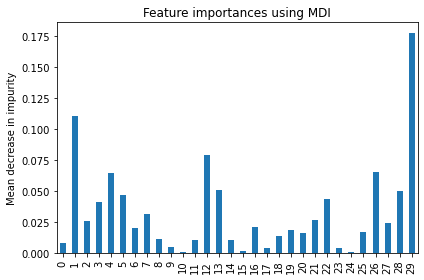

In [ ]:
forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
train_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37413 entries, 30946 to 72281
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   hotel                           37413 non-null  int64
 1   lead_time                       37413 non-null  int64
 2   arrival_date_year               37413 non-null  int64
 3   arrival_date_month              37413 non-null  int64
 4   arrival_date_week_number        37413 non-null  int64
 5   arrival_date_day_of_month       37413 non-null  int64
 6   stays_in_weekend_nights         37413 non-null  int64
 7   stays_in_week_nights            37413 non-null  int64
 8   adults                          37413 non-null  int64
 9   children                        37413 non-null  int64
 10  babies                          37413 non-null  int64
 11  meal                            37413 non-null  int8 
 12  country                         37413 non-null  int16
 1

In [ ]:
df_temp = pd.DataFrame()
df_temp['x'] = train_var.columns
df_temp['feature importants'] = importances
df_temp = df_temp.sort_values('feature importants', ascending=False)
df_temp

,x,feature importants
29,reservation_status_date,0.177042
1,lead_time,0.110206
12,country,0.079262
26,adr,0.065321
4,arrival_date_week_number,0.064339
13,market_segment,0.050760
28,total_of_special_requests,0.050391
5,arrival_date_day_of_month,0.046732
22,agent,0.043175
3,arrival_date_month,0.041259


In [ ]:
dftest = dfdrop[df_temp['x'][0:12]]
train_var = dftest
test_var = dfdrop['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(train_var, test_var, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((29930, 12), (29930,), (7483, 12), (7483,))

In [ ]:
random_forest = RandomForestClassifier().fit(X_train, y_train)
scores = cross_val_score(random_forest, X_train, y_train, cv=5)
rf_pred = random_forest.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(random_forest.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))

Average cross validation score: 0.904
Test accuracy: 0.903
F1 score: 0.810
[[5203  172]
 [ 557 1551]]


In [ ]:
param_grid = { "criterion" : ["entropy"], "min_samples_leaf" : [1, 10], "min_samples_split" : [4, 6], "n_estimators": [400, 600]}

random_forest = RandomForestClassifier()
clf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [ ]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Percobaan Pertama
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 4], "min_samples_split" : [2, 4], "n_estimators": [100, 400]}

random_forest = RandomForestClassifier()
clf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='entropy', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=4,
                        min_weight_fraction_leaf=0.0, n_estimators=400,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)

rf = clf.best_estimator_

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy

Result: 0.9064546304957904

In [ ]:
rf = clf.best_estimator_

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.9052519043164506

Pada percobaan kedua hasilnya adalah 0.9052519043164506, nilai accuracy turun, sehingga parameter yang digunakan adalah criterion='entropy', min_samples_leaf=1, min_samples_split=4, n_estimators=400, dengan hasil 0.9064546304957904.

Setelah melakukan tuning, hasilnya meningkat dari 0.904 menjadi 0.9064546304957904, maka model yang terbaik yang saya pilih adalah random forest yang sudah dilakukan hyperparameter tuning

# Model Evaluation
cancel (1) atau tidak cancel (0).

TP: actual tidak cancel, predicted tidak cancel (5203)

FN: actual tidak cancel, predicted cancel (557)

TN: actual cancel, predicted cancel (1551)

FP: actual cancel, predicted tidak cancel (172)

FP paling berpengaruh karena ketika sebenarnya yang booking hotel itu melakukan cancel, tetapi pihak hotel sudah melakukan persiapan yang utama yaitu banyaknya makanan yang akan di stok, maka pihak hotel akan mengalami kerugian karena menyiapkan makanan tetapi tidak ada tamunya.
